In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time

import pytz

import astroplan
import astroplan.constraints
from astroplan import Observer, FixedTarget, ObservingBlock
from astroplan import PriorityScheduler, SequentialScheduler, Transitioner
from astroplan import plots
color_cycle = plots.mplstyles.astropy_mpl_style['axes.color_cycle']

In [16]:
from astroplan import download_IERS_A
download_IERS_A()

In [17]:
start_time = Time.now()
end_time = start_time+48*u.hour
print(start_time,end_time)

(<Time object: scale='utc' format='datetime' value=2016-03-25 22:24:36.611969>, <Time object: scale='utc' format='datetime' value=2016-03-27 22:24:36.611969>)


In [18]:
#time_diff = end_time.to(u.jd) - start_time.to(u.jd)

In [19]:
min_exposure=2*u.hour
times = start_time + u.Quantity(np.arange(0,(end_time - start_time).value, min_exposure.to(u.day).value), unit=u.day)

In [20]:
len(times)

24

In [21]:
mdm = Observer.at_site('mdm', timezone=pytz.timezone('US/Arizona'))
print(mdm)

<Observer: name='mdm',
    location (lon, lat, el)=(-111.616666667 deg, 31.95 deg, 1938.0 m),
    timezone=<DstTzInfo 'US/Arizona' LMT-1 day, 16:32:00 STD>>


In [22]:
targets = [FixedTarget.from_name('Vega'),
           FixedTarget.from_name('Deneb'),
           FixedTarget.from_name('Arcturus'),
           FixedTarget.from_name('Altair'),
           FixedTarget.from_name('Aldebaran'),
           FixedTarget.from_name('Sirius'),
           FixedTarget.from_name('Betelgeuse'),
           FixedTarget.from_name('Rigel'),
           FixedTarget.from_name('Castor'),
           FixedTarget.from_name('Pollux'),
           FixedTarget.from_name('Polaris')
          ]
targets

[<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>,
 <FixedTarget "Arcturus" at SkyCoord (ICRS): (ra, dec) in deg (213.9153003, 19.18240916)>,
 <FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>,
 <FixedTarget "Aldebaran" at SkyCoord (ICRS): (ra, dec) in deg (68.98016279, 16.50930235)>,
 <FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>,
 <FixedTarget "Betelgeuse" at SkyCoord (ICRS): (ra, dec) in deg (88.79293899, 7.40706399)>,
 <FixedTarget "Rigel" at SkyCoord (ICRS): (ra, dec) in deg (78.63446707, -8.20163837)>,
 <FixedTarget "Castor" at SkyCoord (ICRS): (ra, dec) in deg (113.64947164, 31.88828222)>,
 <FixedTarget "Pollux" at SkyCoord (ICRS): (ra, dec) in deg (116.32895777, 28.02619889)>,
 <FixedTarget "Polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>]

In [23]:
etime = 5*u.min
n = 10
rot = 55*u.second

blocks = []
for i,t in enumerate(targets):
    blocks.append(ObservingBlock.from_exposures(t, i, etime, n, rot))

In [24]:
constraints = [astroplan.constraints.AirmassConstraint(3, boolean_constraint=False),
               astroplan.constraints.AtNightConstraint()
               #,astroplan.constraints.MoonSeparationConstraint(5*u.deg)
               ]

In [25]:
observable = constraints[0].compute_constraint(times,mdm,[targets[0]])
print(observable)

[[ 0.          0.          0.          0.          0.          0.36194431
   0.83499399  0.97433333  0.99164156  0.90497677  0.6071421   0.          0.
   0.          0.          0.          0.          0.39024978  0.84261725
   0.97647068  0.99060647  0.89973201  0.58973717  0.        ]]


In [26]:
print(start_time,type(start_time))
print(start_time.jd)

(<Time object: scale='utc' format='datetime' value=2016-03-25 22:24:36.611969>, <class 'astropy.time.core.Time'>)
2457473.43376


In [27]:
scheduler = PriorityScheduler(start_time, end_time,
                                constraints=constraints, observer=mdm)
schedule = scheduler(blocks)

<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>
2457474.0576 2457474.10216
<FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>
2457475.03792 2457475.08248
<FixedTarget "Arcturus" at SkyCoord (ICRS): (ra, dec) in deg (213.9153003, 19.18240916)>
2457473.87936 2457473.92392
<FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>
2457474.01304 2457474.0576
<FixedTarget "Aldebaran" at SkyCoord (ICRS): (ra, dec) in deg (68.98016279, 16.50930235)>
2457474.59232 2457474.63688
<FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>
2457473.612 2457473.65656
<FixedTarget "Betelgeuse" at SkyCoord (ICRS): (ra, dec) in deg (88.79293899, 7.40706399)>
2457474.68144 2457474.726
<FixedTarget "Rigel" at SkyCoord (ICRS): (ra, dec) in deg (78.63446707, -8.20163837)>
2457473.70112 2457473.74568
<FixedTarget "Castor" at SkyCoord (ICRS): (ra, dec) in deg (113.64947164, 31.888

In [28]:
for sblock in schedule:
    local_start = mdm.astropy_time_to_datetime(sblock.start_time)
    if hasattr(sblock, 'target'):
        print(sblock.target.name, 'starting @', local_start, 'lasting', sblock.duration)
    else:
        print('trans starting @', local_start, 'lasting', sblock.duration, ':', sblock.components)

('Sirius', 'starting @', datetime.datetime(2016, 3, 25, 19, 41, 16, 611967, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Rigel', 'starting @', datetime.datetime(2016, 3, 25, 21, 49, 36, 611964, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Pollux', 'starting @', datetime.datetime(2016, 3, 25, 23, 57, 56, 611961, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Arcturus', 'starting @', datetime.datetime(2016, 3, 26, 2, 6, 16, 611958, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Altair', 'starting @', datetime.datetime(2016, 3, 26, 5, 18, 46, 611954, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Vega', 'starting @', datetime.datetime(2016, 3, 26, 6, 22, 56, 611952, tzinfo=<DstTzInfo 'US/Arizona' MST

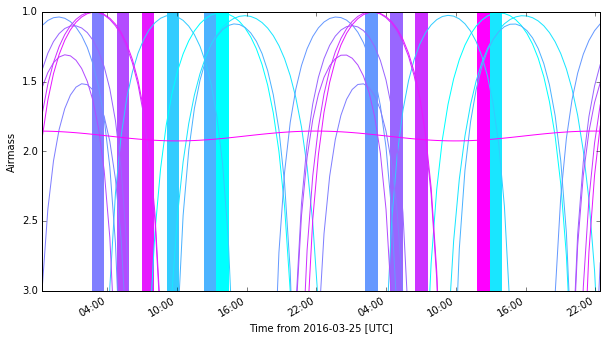

In [29]:
plt.figure(figsize=(10,5))
ts = start_time + np.linspace(0, (end_time-start_time).value, 100)*u.day
targ_to_color = {}
color_idx = np.linspace(0, 1, len(schedule))
for target, ci in zip(targets, color_idx):
    plots.plot_airmass(target, mdm, ts, style_kwargs=dict(color=plt.cm.cool(ci)))
    targ_to_color[target.name] = plt.cm.cool(ci)
#plt.legend(loc=2)

for block in schedule:
    if hasattr(block, 'target'):
        plt.axvspan(block.start_time.plot_date, block.end_time.plot_date, 
                    fc=targ_to_color[block.target.name], lw=0)
ax=plt.gca()


So there's now a flaw in how this is coded, which is that saving the buffer time is leaving gaps in the schedule....